We decided to use Suicide Rates 1985 to 2016 dataset in Part 2.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


- Baby Boomers: Baby boomers were born between 1944 and 1964.
- Gen X: Gen X was born between 1965 - 1979
- Gen Y: Gen Y, or Millennials, were born between 1980 and 1994.
- Gen Y.1 = 25-29 years old (31 million people in U.S.)
- Gen Y.2 = 29-39 (42 million people in U.S.)
- Gen Z: Gen Z is the newest generation to be named and were born between 1995 and 2015.

#### Hypothesis #1

Male suicides are higher than female's in Turkey between the years 2009-2015.

In [4]:
Turkey_suicide = df[df["country"]=="Turkey"] 
Turkey_suicide[["country","year","sex","suicides_no"]].head()

,country,year,sex,suicides_no
25636,Turkey,2009,male,33
25637,Turkey,2009,male,130
25638,Turkey,2009,male,287
25639,Turkey,2009,male,189
25640,Turkey,2009,male,139


In [5]:
Turkey_suicide.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,84.000000,84.000000,8.400000e+01,84.000000,60.000000,84.000000
mean,2012.000000,120.607143,5.745721e+06,2.371071,0.753000,12134.285714
std,2.012012,108.517726,2.584717e+06,1.872715,0.008291,1172.292498
min,2009.000000,15.000000,8.066230e+05,0.240000,0.738000,9773.000000
25%,2010.000000,32.000000,4.752676e+06,0.982500,0.751000,11525.000000
50%,2012.000000,78.500000,6.212256e+06,1.650000,0.756000,12237.000000
75%,2014.000000,181.000000,6.491964e+06,3.742500,0.759000,13170.000000
max,2015.000000,477.000000,1.046660e+07,8.300000,0.761000,13603.000000


In [6]:
print("Sucides no of Turkey=", Turkey_suicide["suicides_no"].sum())

Sucides no of Turkey= 10131


In [7]:
male_suicide= Turkey_suicide[Turkey_suicide["sex"]=="male"]
male_suicide[["year","age","sex","suicides_no"]].head()

,year,age,sex,suicides_no
25636,2009,75+ years,male,33
25637,2009,55-74 years,male,130
25638,2009,35-54 years,male,287
25639,2009,25-34 years,male,189
25640,2009,15-24 years,male,139


In [8]:
print("Suicides of men=", male_suicide["suicides_no"].sum())

Suicides of men= 7562


In [9]:
female_suicide= Turkey_suicide[Turkey_suicide["sex"]=="female"]
female_suicide[["year","age","sex","suicides_no"]].head()

,year,age,sex,suicides_no
25641,2009,75+ years,female,17
25642,2009,15-24 years,female,74
25643,2009,55-74 years,female,38
25644,2009,25-34 years,female,44
25645,2009,35-54 years,female,58


In [10]:
print("Suicides of women=", female_suicide["suicides_no"].sum())

Suicides of women= 2569


### Use exploratory data analysis and graphical methods to check your hypothesis.

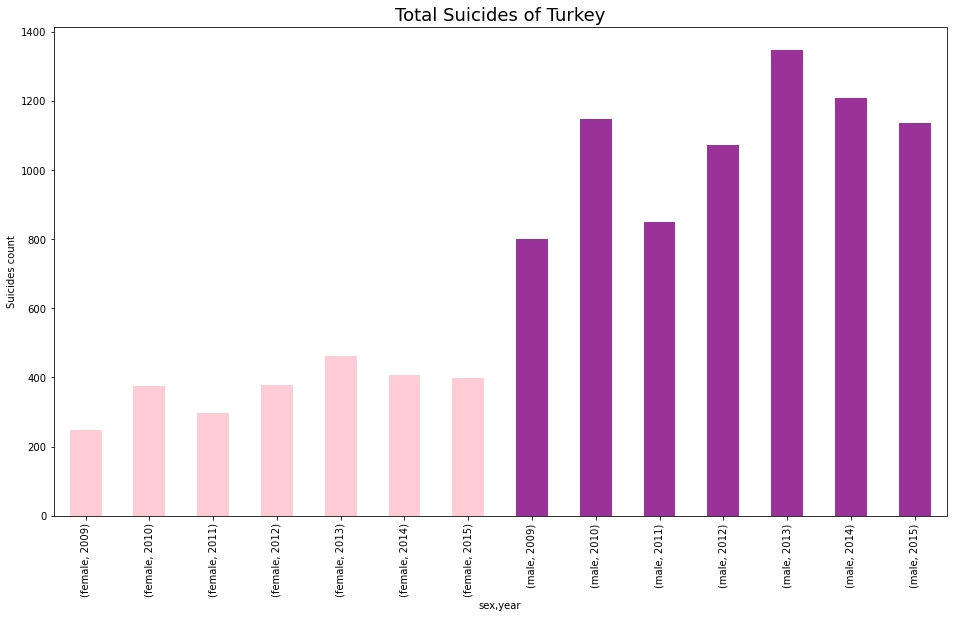

In [11]:
plt.figure(figsize=(16,9)) 
plt.ylabel('Suicides count')
colors = ['pink','pink','pink','pink','pink','pink','pink','purple','purple','purple','purple','purple','purple','purple','purple']
plt.title('Total Suicides of Turkey',fontsize = 18)
Turkey_suicide.groupby(['sex','year'])['suicides_no'].agg('sum').plot(kind='bar',color=colors,alpha=0.8)
plt.show()

As we can see between the years 2009-2015 male suicide rankings are higher than females by the gap 7562-2569=4993

#### Hypothesis #2

The most suicides have been commited by the 25-34 aged group of people in the world.

In [12]:
ages= ["5-14 years","15-24 years","25-34 years","35-54 years","55-74 years","75+ years"]
categories = list()
sizes = list()
for i in ages:
    categories.append(data[data["age"] ==i ])

for i in range(len(categories)):
    print("Suicide of", ages[i], "=", categories[i]["suicides_no"].sum())
    sizes.append(categories[i]["suicides_no"].sum())

Suicide of 5-14 years = 52264
Suicide of 15-24 years = 808542
Suicide of 25-34 years = 1123912
Suicide of 35-54 years = 2452141
Suicide of 55-74 years = 1658443
Suicide of 75+ years = 653118


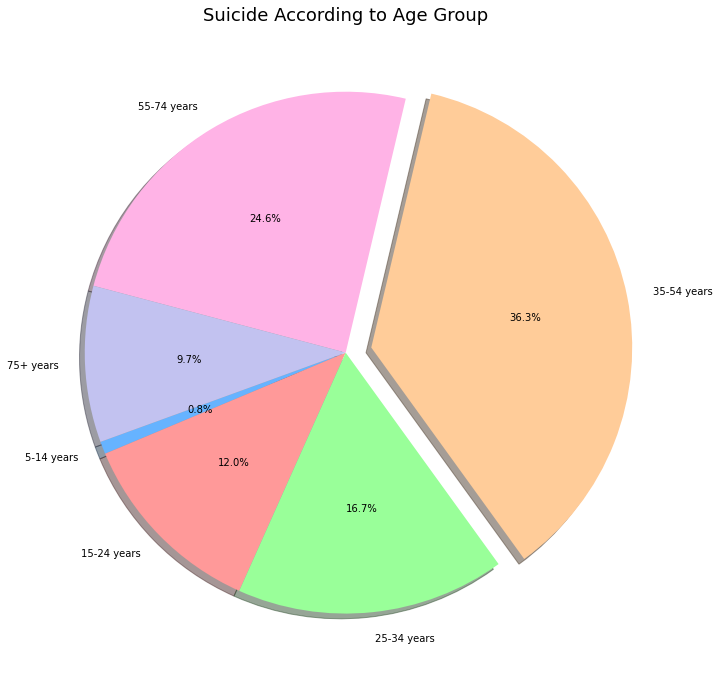

In [13]:
plt.figure(figsize = (12,12))
explode = (0, 0, 0, 0.1, 0, 0)
colors = ['#66b3ff','#ff9999','#99ff99', '#ffcc99', '#ffb3e6', '#c2c2f0']
plt.pie(sizes,explode=explode, labels=ages, colors=colors, autopct='%1.1f%%', startangle=200, shadow=True)
plt.title('Suicide According to Age Group',fontsize = 18)
plt.show()

We have proven our hypotesis wrong : "The most suicides have been commited by the 25-34 aged group of people in the world." As we can see from the graphic, 35-54 aged people are by far the most suicidal with %36.3 percentage. There are 2.452.141 reported suicide cases by that group of people.